# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Jueves 23 de Noviembre del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Sophia Contreras**
1. **Yoksan Varela**


---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como: 

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal. 

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



**Proceso Gram - Schmidt:**

![alt text][def]

[def]: Proceso_GramSchmidt_Parte1.png "Title"

![alt text][def]

[def]: Proceso_GramSchmidt_Parte2.png "Title"

![alt text][def]

[def]: Proceso_GramSchmidt_Parte3.png "Title"

In [1]:
# Imports
%matplotlib inline
from numpy import linalg as LA
from numpy.linalg import pinv
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import math

# Usando Proceso de ortonormalización de  Gram - Schmidt (revisar pdf adjunto), se define el vector e = V
# Matriz inicial propuesta para el calculo: [1,1,1],[1,0,1],[1,1,0]
V = np.array([[1/math.sqrt(3),1/math.sqrt(3),1/math.sqrt(3)],
              [1/(3*math.sqrt(2/3)),-2/(3*math.sqrt(2/3)),1/(3*math.sqrt(2/3))],
              [-1/(2*math.sqrt(1/2)),0,1/(2*math.sqrt(1/2))]])

VT = np.transpose(V)
result = np.matmul(V,VT)
print(" El resultado de la multiplicacion entre V y VT Transpuesta:\n"+str(result))

print("Como el resultado es una matriz identida I, se deduce que la matriz es ortonormal\n")

# Confirmando con las normas 2 de los vectores
normaE1 = LA.norm(V[0,:])
print("Norma del Vector 1: "+str(normaE1))
normaE2 = LA.norm(V[1,:])
print("Norma del Vector 2: "+str(normaE2))
normaE3 = LA.norm(V[2,:])
print("Norma del Vector 3: "+str(normaE3))

print("Como todos los vectores de la matriz son ortogonales, se deduce que la matriz es ortonormal")


 El resultado de la multiplicacion entre V y VT Transpuesta:
[[ 1.00000000e+00 -1.66584120e-17  1.77961928e-17]
 [-1.66584120e-17  1.00000000e+00 -2.45142679e-17]
 [ 1.77961928e-17 -2.45142679e-17  1.00000000e+00]]
Como el resultado es una matriz identida I, se deduce que la matriz es ortonormal

Norma del Vector 1: 1.0
Norma del Vector 2: 1.0
Norma del Vector 3: 0.9999999999999999
Como todos los vectores de la matriz son ortogonales, se deduce que la matriz es ortonormal


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [2]:
# Vector u:
u = np.array([3,-4,5])

# Primera operacion: V(VT.V)^-1.VT.u
resultado2 = np.matmul(np.matmul(V,LA.inv(np.matmul(np.transpose(V),V))),np.matmul(np.transpose(V),u))
print("El resultado de la operacion V(VT.V)^-1.VT.u es: "+str(resultado2))

# Segunda operacion: V.VT.u
resultado3 = np.matmul(np.matmul(V,np.transpose(V)),u)
print("El resultado de la operacion V.VT.u es: "+str(resultado3))

El resultado de la operacion V(VT.V)^-1.VT.u es: [ 3. -4.  5.]
El resultado de la operacion V.VT.u es: [ 3. -4.  5.]


**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [3]:
def errorProyeccion(result, orig):
    """ Funcion para calcular el error entre la proyeccion y el arreglo original
    Args:
        result (array): arreglo obtenido de los calculos
        orig (array): arreglo original
    """
    return LA.norm(result-orig,2)

primeraProyeccion = errorProyeccion(resultado2,u)
print("Error de la primera proyeccion: "+str(primeraProyeccion))

segundaProyeccion = errorProyeccion(resultado3,u)
print("Error de la segunda proyeccion: "+str(segundaProyeccion))

Error de la primera proyeccion: 4.440892098500626e-16
Error de la segunda proyeccion: 1.538370149106851e-15


---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [4]:
def calculeDet2(M):
    """ Funcion para calcular el determinante de matrices 2x2

    Args:
        M (Matrix): Matriz 2x2
    """
    return ((M[0][0]*M[1][1])-(M[0][1]*M[1][0]))

matriz1 = np.array([[4,5],[9,8]])
det1 = calculeDet2(matriz1)
print("El determinante de la matriz 2x2 es: "+str(det1))

El determinante de la matriz 2x2 es: -13


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [5]:
def calculeDet3(M):
    """ Funcion para calcular el determinante de matrices 3x3

    Args:
        M (Matrix): Matriz 3x3
    """
    partial1 = M[0][0]*(M[1][1]*M[2][2]-M[1][2]*M[2][1])
    partial2 = -M[1][0]*(M[0][1]*M[2][2]-M[0][2]*M[2][1])
    partial3 = M[2][0]*(M[0][1]*M[1][2]-M[0][2]*M[1][1])
    return(partial1 + partial2 + partial3)

matriz2 = np.array([[3,6,2],[5,8,1],[2,7,4]])
det2 = calculeDet3(matriz2)
print("El determinante de la matriz 3x3 es: "+str(det2))

El determinante de la matriz 3x3 es: 5


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [6]:
# Primera Matriz
A = np.array([[5,6,2,3],[9,8,6,4],[7,8,6,5],[1,1,2,3]])

# Segunda Matriz
B = np.array([[8,6,9,8],[4,5,3,2],[6,7,6,5],[4,5,4,3]])

# Primera parte de la ecuacion
AB = np.matmul(A,B)
detAB = np.linalg.det(AB)
print("det(AB) = "+str(round(detAB)))

# Segunda parte de la ecuacion
detA = np.linalg.det(A)
detB = np.linalg.det(B)

mul_detAdetB = detA * detB
print("det(A) * det (B) = "+str(round(mul_detAdetB)))

print("Se demuestra la igualdad (Nota: los resultados se estan redondeando porque hay diferencias en los decimales, pero de orden muy bajo)")


det(AB) = 480
det(A) * det (B) = 480
Se demuestra la igualdad (Nota: los resultados se estan redondeando porque hay diferencias en los decimales, pero de orden muy bajo)


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [7]:
# Creando un dataframe
archivo = "Dataset_usar.csv"

dataFrame = pd.read_csv(archivo, header = 0, delimiter=';')
colNames = dataFrame.columns
print(dataFrame.head())

   bias    Length  Diameter    Height     Whole   Shucked  Sex_Female  \
0     1  0.186567  0.155963  0.195652  0.011688  0.333333           0   
1     1  0.813433  0.761468  0.826087  0.433327  0.333333           1   
2     1  0.410448  0.376147  0.369565  0.074022  0.333333           1   
3     1  0.537313  0.504587  0.500000  0.143085  0.333333           1   
4     1  0.507463  0.495413  0.565217  0.146981  0.333333           0   

   Sex_Masculine  Shellweight  
0              1        0.010  
1              0        0.435  
2              0        0.068  
3              0        0.096  
4              1        0.144  


In [8]:
# Convertir de pandas a numpy
test = pd.DataFrame(dataFrame).to_numpy()

# ver dimensiones
total_columnas = test.shape[1] # columnas
total_filas = test.shape[0] # filas
print("Total filas ", total_filas)
print("Total columnas ", total_columnas)

Total filas  998
Total columnas  9


In [9]:
def muestreVectorConNombre( pVector , pNombres):
    for i in range( len(pVector)):
        print( pNombres[i] , " : ", pVector[i] )
    print("\n")

In [10]:
# Conforme la matriz A con las primeras 8 columnas y Conforme el vector b con la última columna de la derecha

# A , 8 columnas
# bias, Length, Diameter, Height, Whole, Shucked, Sex_Female, Sex_Masculine
A = test[:, 0:total_columnas - 1] # todas menos la última
print("Primer fila de A: ")
muestreVectorConNombre( A[0], colNames)

# b  , 1 columna
# Shellweight
b = test[:, total_columnas - 1]  # la última
print("Primeros elementos de b: ", b[0:5])

Primer fila de A: 
bias  :  1.0
Length  :  0.186567164
Diameter  :  0.155963303
Height  :  0.195652174
Whole  :  0.011687622
Shucked  :  0.333333333
Sex_Female  :  0.0
Sex_Masculine  :  1.0


Primeros elementos de b:  [0.01  0.435 0.068 0.096 0.144]


In [11]:
# Creando x a partir de mínimos cuadrados: (AT.A)^-1.AT.b, usando la aproximacion de la matrix Moore-Penrose
x = np.matmul(pinv(np.matmul(np.transpose(A),A)),np.matmul(np.transpose(A),b))
print("Vector de pesos x:\n"+str(x))

Vector de pesos x:
[ 0.01298003 -0.07107447  0.00203732  0.08440335  0.89314748 -0.07685081
  0.00639926  0.00658077]


In [12]:
b_estimado = np.matmul(A, x)
print("Valor de b estimado:\n" + str(b_estimado))

Valor de b estimado:
[0.00795392 0.39424921 0.06266108 0.12659862 0.13786722 0.10189529
 0.0095726  0.40654214 0.17761661 0.29570968 0.27953112 0.25306109
 0.17372371 0.17123082 0.24563351 0.27945597 0.35743935 0.53538113
 0.63780604 0.08449686 0.09339824 0.17184747 0.37209852 0.05155341
 0.04107342 0.1337257  0.05592014 0.05819802 0.19792255 0.19450077
 0.05736149 0.03909061 0.14607987 0.27361606 0.0927977  0.04701044
 0.38886303 0.05878864 0.04494088 0.14571031 0.28453475 0.0564301
 0.1797985  0.34269521 0.52628498 0.13221085 0.48299815 0.29003694
 0.40972321 0.0716018  0.34926074 0.01547366 0.25417031 0.41022259
 0.25148249 0.07914457 0.12938356 0.14991186 0.46912752 0.03917065
 0.21487825 0.27971381 0.13980379 0.22335389 0.30076126 0.14794345
 0.17669062 0.31993973 0.32715262 0.02115316 0.20243816 0.36883371
 0.31379943 0.41031155 0.1965695  0.33344826 0.02516699 0.34924829
 0.0635543  0.11626176 0.00618232 0.15461345 0.09875346 0.35219295
 0.12655004 0.23123311 0.14167154 0.058981

In [13]:
dif_b_bEstimado = LA.norm(b - b_estimado)
print("Entre b y b_estimado: ", dif_b_bEstimado)

Entre b y b_estimado:  1.2226067361507618


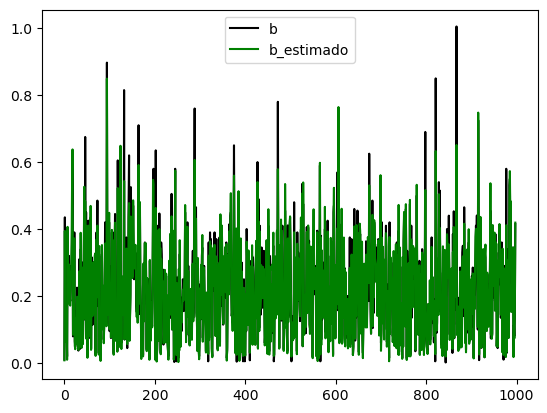

In [14]:
# Graficando b y b_estimado
cantidad_muestras = len(b)
eje_X = np.array(range(cantidad_muestras))

plt.plot(eje_X, b, label = "b", color="k") # black
plt.plot(eje_X, b_estimado, label = "b_estimado", color= "g") # green
plt.legend()

plt.show()

In [15]:
import plotly.express as px
# https://plotly.com/python/

parte1 = np.array([x for x in range(len(b))])
parte2 = np.array([x for x in range(len(b_estimado))])

x = np.concatenate((parte1, parte2))
y = np.concatenate((parte1, parte2))

z = np.concatenate((np.array(b) , np.array(b_estimado)))

parteColor1 = ["b" for x in range(len(b))]
parteColor2 = ["b_estimado" for x in range(len(b_estimado))]

colorLine = parteColor1 + parteColor2
df1 = pd.DataFrame({"x": x, "y":y, "z":z, "color":colorLine})
df1['tamano'] = 0.25
fig = px.scatter_3d(df1, x="x", y="y", z="z", color="color", size = "tamano")
fig.show()

fig.write_html("Graficación.html")